In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

from battery_predictor_EIS import BatteryPredictor

In [3]:
df = pd.read_csv('./data/Data_Capacity_25C01.txt', sep='\t')
df.describe()

,time/s,cycle number,ox/red,Capacity/mA.h
count,5.817750e+05,581775.000000,581775.000000,581775.000000
mean,2.495383e+06,174.224540,0.355641,11.949096
std,1.372355e+06,101.017462,0.478707,10.331417
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.314271e+06,87.000000,0.000000,2.099345
50%,2.572011e+06,175.000000,0.000000,9.531494
75%,3.716370e+06,261.000000,1.000000,20.417184
max,4.670920e+06,349.000000,1.000000,37.202713


In [4]:
df.head()

,time/s,cycle number,ox/red,Capacity/mA.h
0,0.0000,0.0,1,0.000000
1,0.0002,0.0,1,0.000003
2,0.0008,0.0,1,0.000010
3,0.0012,0.0,1,0.000015
4,0.0016,0.0,1,0.000020


In [5]:
df_groupby_cycle = df.groupby('cycle number')
df_groupby_cycle.describe()

time/s                                                         \
               count          mean          std           min           25%   
cycle number                                                                  
0.0           1644.0  4.463367e+03  2234.921095  0.000000e+00  2.195012e+03   
1.0           1692.0  2.051782e+04  2300.784810  1.601832e+04  1.830966e+04   
2.0           1688.0  3.644754e+04  2276.092067  3.202178e+04  3.425685e+04   
3.0           1677.0  5.224795e+04  2243.000411  4.784830e+04  5.006484e+04   
4.0           1679.0  6.790717e+04  2238.036651  6.354796e+04  6.572960e+04   
...              ...           ...          ...           ...           ...   
345.0         1628.0  4.629339e+06  1867.991855  4.626213e+06  4.627188e+06   
346.0         1658.0  4.639434e+06  1971.401589  4.636156e+06  4.637152e+06   
347.0         1630.0  4.649471e+06  1888.423384  4.646296e+06  4.647318e+06   
348.0         1627.0  4.659415e+06  1883.497152  4.656243e+06  4.657273e+06   
349.0         1632.0  4.669324e+06  1883.838577  4.666176e+06  4.667153e+06   

                                                        ox/red            ...  \
                       50%           75%           max   count      mean  ...   
cycle number                                                              ...   
0.0           5.385497e+03  6.382563e+03  6.620639e+03  1644.0  0.338200  ...   
1.0           2.151763e+04  2.250995e+04  2.277055e+04  1692.0  0.356383  ...   
2.0           3.744267e+04  3.841167e+04  3.867518e+04  1688.0  0.356043  ...   
3.0           5.322231e+04  5.417376e+04  5.443129e+04  1677.0  0.351819  ...   
4.0           6.888590e+04  6.982976e+04  7.008753e+04  1679.0  0.353186  ...   
...                    ...           ...           ...     ...       ...  ...   
345.0         4.630579e+06  4.630733e+06  4.630921e+06  1628.0  0.366093  ...   
346.0         4.640777e+06  4.640930e+06  4.641122e+06  1658.0  0.378166  ...   
347.0         4.650726e+06  4.650879e+06  4.651068e+06  1630.0  0.366871  ...   
348.0         4.660664e+06  4.660817e+06  4.661005e+06  1627.0  0.365704  ...   
349.0         4.670581e+06  4.670732e+06  4.670920e+06  1632.0  0.367647  ...   

                       Capacity/mA.h                                       \
              75%  max         count       mean        std  min       25%   
cycle number                                                                
0.0           1.0  1.0        1644.0  19.789114  13.172753  0.0  6.663747   
1.0           1.0  1.0        1692.0  19.673310  13.185619  0.0  6.081252   
2.0           1.0  1.0        1688.0  19.190114  12.939048  0.0  5.799101   
3.0           1.0  1.0        1677.0  18.948208  12.730117  0.0  5.824432   
4.0           1.0  1.0        1679.0  18.688483  12.624557  0.0  5.628834   
...           ...  ...           ...        ...        ...  ...       ...   
345.0         1.0  1.0        1628.0   4.597517   4.578679  0.0  0.609231   
346.0         1.0  1.0        1658.0   4.949575   5.044968  0.0  0.656575   
347.0         1.0  1.0        1630.0   4.682560   4.680365  0.0  0.628894   
348.0         1.0  1.0        1627.0   4.658734   4.651380  0.0  0.627279   
349.0         1.0  1.0        1632.0   4.600103   4.620307  0.0  0.603126   

                                               
                    50%        75%        max  
cycle number                                   
0.0           21.483287  32.830315  37.202713  
1.0           21.830902  32.853747  36.720858  
2.0           21.243885  32.118851  35.911835  
3.0           20.985425  31.660436  35.311439  
4.0           20.635187  31.312455  34.941622  
...                 ...        ...        ...  
345.0          3.431248   7.130737  16.392269  
346.0          3.632909   7.393031  17.939416  
347.0          3.491832   7.186612  16.736677  
348.0          3.476870   7.156274  16.647150  
349.0          3.404997   7.086954  16.556953  

[350 rows x 24 colum

In [6]:
capacity = []
for cycle, df in df_groupby_cycle:
    capacity.append(df['Capacity/mA.h'].max())
    
len(capacity)

350

In [7]:
def get_80_percent_point(capacity):
    cnt = 0
    target_idx = -1
    target_capacity = 0
    for i, c in enumerate(capacity):
        if c < 0.8 * capacity[0]:
            if cnt == 0:
                target_idx = i
                target_capacity = c
            if cnt == 3:
                return target_idx, target_capacity
            cnt += 1
        else:
            cnt = 0
            
    raise ValueError("No 80% point found")

In [8]:
get_80_percent_point(capacity)

(119, 29.65830480313531)

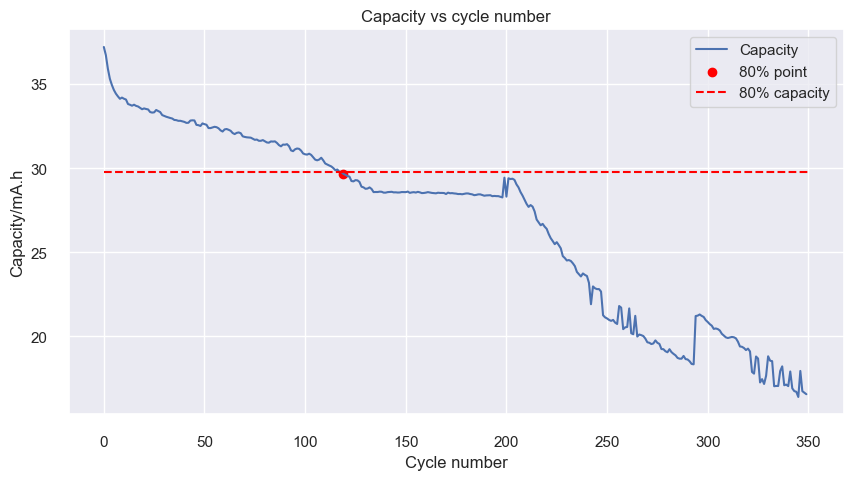

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(capacity)
plt.scatter(*get_80_percent_point(capacity), color='red')
plt.plot([0, len(capacity)], [0.8 * capacity[0], 0.8 * capacity[0]], color='red', linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Capacity/mA.h')
plt.title('Capacity vs cycle number')
plt.legend(['Capacity', '80% point', '80% capacity'])
plt.show()

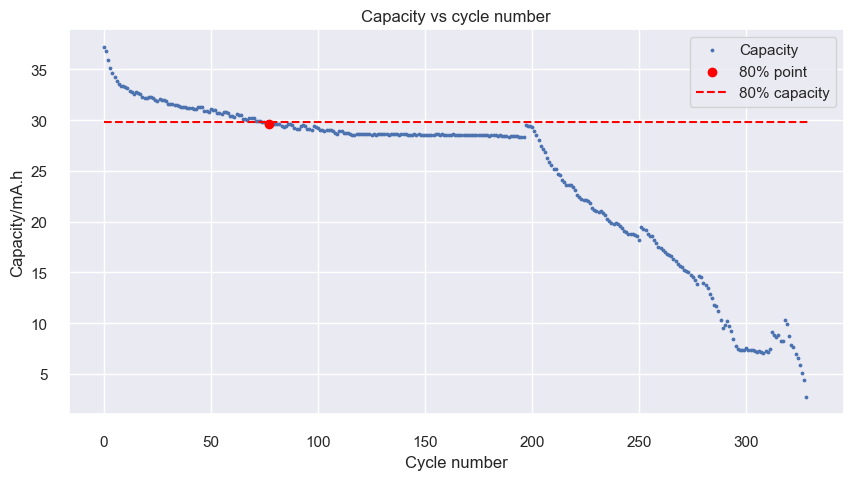

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(capacity)), capacity, s=3)
plt.scatter(*get_80_percent_point(capacity), color='red')
plt.plot([0, len(capacity)], [0.8 * capacity[0], 0.8 * capacity[0]], color='red', linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Capacity/mA.h')
plt.title('Capacity vs cycle number')
plt.legend(['Capacity', '80% point', '80% capacity'])
plt.show()

In [12]:
np.save('data_npy/capacity.npy', capacity)